In [85]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from pprint import pprint
import pandas as pd 
from random import sample
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import requests
import os
import librosa

In [19]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id="INSERT ID",
                                               client_secret="INSERT SECRET",
                                               redirect_uri="http://localhost:8888/callback",
                                               scope="user-library-read"))

In [20]:
def getTracks(url):
    tracks = []
    response = sp.playlist_items(url,
                                    offset=0,
                                    fields='items.track.id, items.track.preview_url, total',
                                    additional_types=['track'])
    if len(response['items']) == 0:
        return null 

    for item in response['items']:
        tracks.append(item['track'])

    return tracks

In [21]:
playlists = {
    'pop': ["https://open.spotify.com/playlist/37i9dQZF1DX5gQonLbZD9s?si=30767127b8f94469"],
    'rock': ["https://open.spotify.com/playlist/37i9dQZF1DXcF6B6QPhFDv?si=b03e02334d354bf8"],
    'classical': ["https://open.spotify.com/playlist/37i9dQZF1DWWEJlAGA9gs0?si=96c90b5d91994be8"],
    'country': ["https://open.spotify.com/playlist/37i9dQZF1DX1lVhptIYRda?si=598d4d9cae29480a"]
}

In [22]:
tracks = {}
for genre in playlists: 
    for playlist in playlists[genre]: 
        if not genre in tracks: 
            tracks[genre] = getTracks(playlist)
        else: 
            tracks[genre].extend(getTracks(playlist))

In [24]:
# crop number of tracks 
lens = []
for genre in tracks:
    lens.append(len(tracks[genre]))

size = min(lens)

for genre in tracks: 
    tracks[genre] = sample(tracks[genre], size)

print(f"The number of tracks per category: {size}")
total = len(tracks["pop"]) + len(tracks["rock"]) + len(tracks["classical"]) + len(tracks["country"])
print(f"The number of tracks: {total}")

The number of tracks per category: 50
The number of tracks: 200


In [28]:
features = []

for genre in tracks:
    for track in tracks[genre]: 
        track["genre"] = genre
    features.extend(tracks[genre])
len(features)

200

In [31]:
df = pd.DataFrame(features)
print(df.shape)
df.drop_duplicates(subset="id", inplace=True)
df.dropna(subset=["preview_url"], inplace=True)
print(df.shape)

(200, 3)
(172, 3)


In [32]:
sizes = []
for genre in playlists:
    sizes.append(df[df["genre"] == genre].shape[0])

size = min(sizes)

#new_data = []
for genre in tracks: 
    #print(df[df["genre"] == genre].shape[0])
    diff = df[df["genre"] == genre].shape[0] - size
    #print(diff)
    drop_indices = np.random.choice(df[df["genre"] == genre].index, diff, replace=False)
    df.drop(drop_indices, inplace=True)

#df = pd.DataFrame(new_data)
print(f"The number of tracks per category: {size}")
print(f"The number of tracks: {df.shape[0]}")


43
8
48
13
35
0
46
11
The number of tracks per category: 35
The number of tracks: 140


In [89]:
df.iloc[0,1]

'https://p.scdn.co/mp3-preview/c424249e27d2bc82982e8b0ce3fc1d0d63cdaf83?cid=f3a52efb14cf42a3840d1c04b283ca91'

In [74]:
def download_mp3(url, directory, name):
    print(f"Downloading {name}")
    r = requests.get(url)
    open(os.path.join(directory, name + ".mp3"), 'wb').write(r.content)

#     download_mp3(x['preview_url'], "/Users/tanviwagle/Desktop/Genre Detection/python-download", x['id'

## Download Audio Files

In [75]:
df.apply(lambda row: download_mp3(row[1], f"/Users/tanviwagle/Desktop/Genre Detection/python-download/audio_raw/{genre}", row[0]), axis=1);

In [98]:
from pydub import AudioSegment
genres = ["country", "pop", "rock", "classical"]
for g in genres: 
    print(f"Converting {g}")
    path = f"/Users/tanviwagle/Desktop/Genre Detection/python-download/audio_raw/{g}/"
    files = os.listdir(path) 
    for f in files: 
        print(f"Converting {f}")
        sound = AudioSegment.from_mp3(path+f)
        name = f.split(".")[0]
        sound.export(f"/Users/tanviwagle/Desktop/Genre Detection/python-download/audio_wav/{g}/{name}.wav", format="wav")

Converting {g}
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting f
Converting

In [101]:
genres = ["country", "pop", "rock", "classical"]
for g in genres: 
    print(f"Loading {g}")
    path = f"/Users/tanviwagle/Desktop/Genre Detection/python-download/audio_wav/{g}/"
    files = os.listdir(path) 
    for f in files: 
        audio, sr = librosa.load(path+f)
        print(audio)
        print(y.shape)
        break
    break

Loading country
[-0.3285763  -0.55778325 -0.29411355 ... -0.18000457 -0.10721508
  0.10498968]
(661501,)


In [97]:
path = "/Users/tanviwagle/Desktop/Genre Detection/python-download/audio_wav/country/5CfxpBCYwfB17MMgARumHl.wav"
#files = os.listdir(path) 
y, sr = librosa.load(path)

## Pre-Process Data

In [145]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['genre'])
y_true = df['genre']
y = le.transform(df["genre"])
Y = le.transform(df["genre"])
X = df.iloc[:, 0:11] 

scaled = preprocessing.MinMaxScaler().fit_transform(X)
X = pd.DataFrame(scaled, columns = X.columns)

## Split into Training and Testing 

In [128]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y)
print(f"The size of training data is: {train_x.size}")
print(f"The size of testing data is: {test_x.size}")

The size of training data is: 3465
The size of testing data is: 1155


## Try Machine Learning Algorithms

In [129]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

In [130]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_search(parameters, classifier, train_x, train_y):
    grid = GridSearchCV(estimator=classifier, param_grid=parameters, cv=kfold, scoring='accuracy')
    grid.fit(train_x, train_y)
    return grid

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
hp = [{'n_neighbors': [2, 3, 4, 6, 8, 10, 15, 30, 35]}]

knn = hyperparameter_search(hp, KNeighborsClassifier(), train_x, train_y)
print(knn.best_score_)
print(knn.best_estimator_)
print(knn.best_params_)

0.6507936507936508
KNeighborsClassifier(n_neighbors=4)
{'n_neighbors': 4}


In [132]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

hp = [{'max_depth': [None, 5, 10, 15, 20]}]
dt = hyperparameter_search(hp, DecisionTreeClassifier(), train_x, train_y)

print(dt.best_score_)
print(dt.best_estimator_)
print(dt.best_params_)

0.7047619047619047
DecisionTreeClassifier(max_depth=5)
{'max_depth': 5}


In [133]:
from sklearn.ensemble import RandomForestClassifier

hp = [{'n_estimators': [10,100, 1000], 'max_depth': [None]}]
rfc = hyperparameter_search(hp, RandomForestClassifier(), train_x, train_y)

print(rfc.best_score_)
print(rfc.best_estimator_)
print(rfc.best_params_)

0.7777777777777777
RandomForestClassifier()
{'max_depth': None, 'n_estimators': 100}


In [134]:
from sklearn.svm import SVC

hp = [{'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 'decision_function_shape': ['ovo']}]
svc = hyperparameter_search(hp, SVC(), train_x, train_y)

print(svc.best_score_)
print(svc.best_estimator_)
print(svc.best_params_)

0.7428571428571428
SVC(decision_function_shape='ovo', kernel='poly')
{'decision_function_shape': 'ovo', 'kernel': 'poly'}


In [135]:
from sklearn.linear_model import LogisticRegression

hp = [{'solver' : ['liblinear']}]
logreg = hyperparameter_search(hp, LogisticRegression(), train_x, train_y)

print(logreg.best_score_)
print(logreg.best_estimator_)
print(logreg.best_params_)

0.6825396825396826
LogisticRegression(solver='liblinear')
{'solver': 'liblinear'}


In [40]:
from sklearn.neural_network import MLPClassifier

hp = [{'alpha' : [1e-5, 1e-8], 'random_state': [1], 'hidden_layer_sizes': [(500,10)], 'max_iter': [10000]}]
nn = hyperparameter_search(hp, MLPClassifier(), train_x, train_y)

print(nn.best_score_)
print(nn.best_estimator_)
print(nn.best_params_)

0.72
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(500, 10), max_iter=10000,
              random_state=1)
{'alpha': 1e-05, 'hidden_layer_sizes': (500, 10), 'max_iter': 10000, 'random_state': 1}


## ANALYSIS

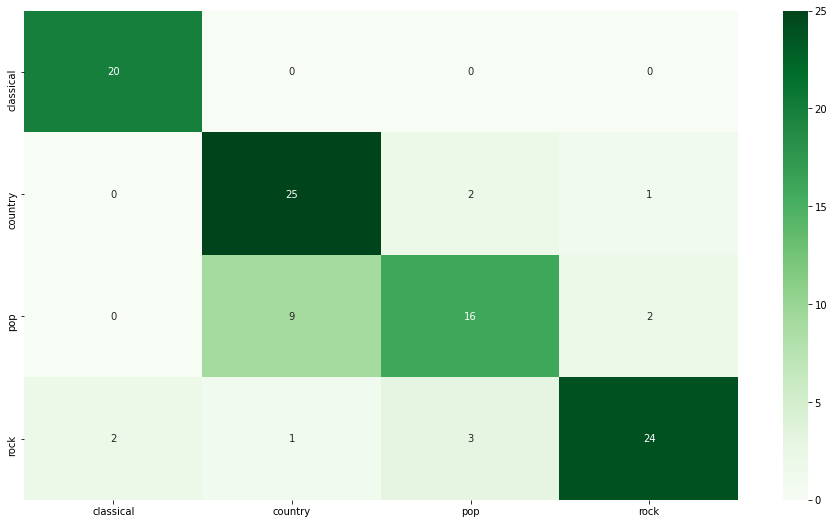

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
preds = rfc.predict(test_x)
confusion_matr = confusion_matrix(le.inverse_transform(test_y), le.inverse_transform(preds))
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Greens", annot=True, 
            xticklabels = le.classes_,
           yticklabels= le.classes_);

In [137]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=rfc, random_state=1)
perm.fit(test_x, test_y)

eli5.show_weights(estimator=perm, feature_names = test_x.columns.tolist())

Weight,Feature
0.1257 ± 0.0441,instrumentalness
0.0952 ± 0.0400,loudness
0.0743 ± 0.0473,danceability
0.0286 ± 0.0781,acousticness
0.0210 ± 0.0143,valence
0.0190 ± 0.0361,speechiness
0.0171 ± 0.0473,energy
0.0057 ± 0.0194,tempo
0.0057 ± 0.0392,mode
-0.0019 ± 0.0143,key


## UNSUPERVISED LEARNING

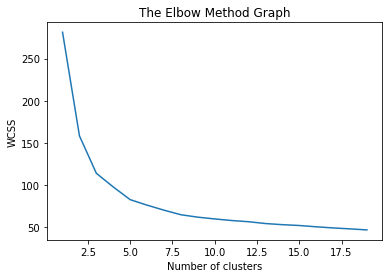

In [138]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,20): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(train_x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [144]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(X)
kmeans

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3,
       3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 3, 0, 3, 3, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3,

[[1.0, 0.0, 0.0, 0.0], [0.00851063829787234, 0.42127659574468085, 0.25957446808510637, 0.31063829787234043], [0.0, 0.07317073170731707, 0.5365853658536586, 0.3902439024390244], [1.0, 0.0, 0.0, 0.0]]


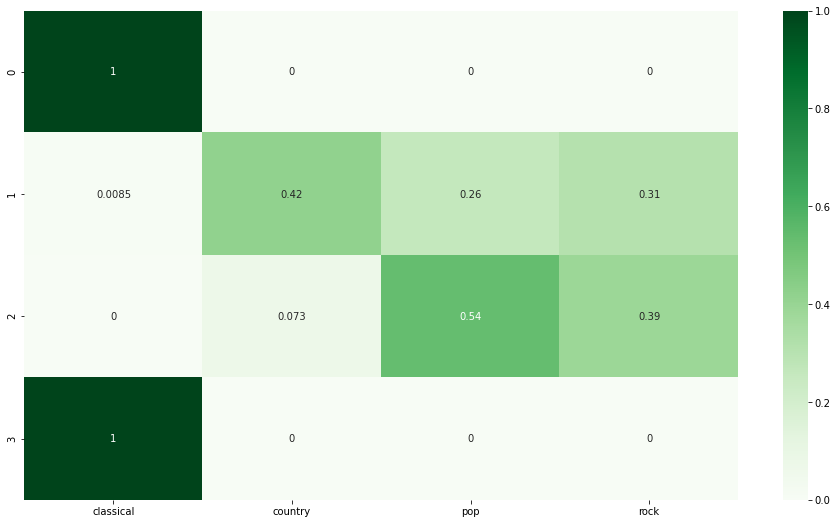

In [146]:
c_matrix = []
for x in range(4):
    true_label = Y[kmeans == x]
    arr = []
    for y in range(4):
        correct_label = true_label[np.where(true_label == y)]
        arr.append(len(correct_label)/len(true_label))
    c_matrix.append(arr)

print(c_matrix)
plt.figure(figsize = (16, 9))
sns.heatmap(c_matrix, cmap="Greens", annot=True, 
            xticklabels = le.classes_,
           yticklabels= [y for y in range(4)]);